1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


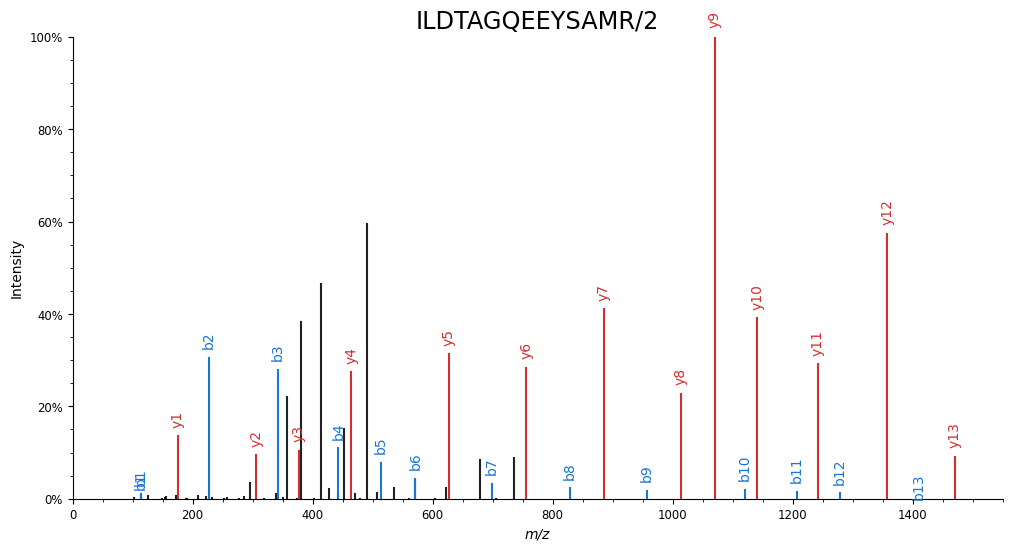

In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
from pyteomics import mass

from src.helper import *


input_sequence = "ILDTAGQEEYSAMR"
charge = 2
NCE = 0.3
peptide = input_sequence + "/" + str(charge)
precursor = mass.calculate_mass(sequence=input_sequence, charge=charge)


loaded_model = tf.keras.models.load_model("D:/ms2/nbs/model_20Epoch.keras", compile=False)


input_instance = [np.array(seq_int(input_sequence)).reshape(1,-1), np.array([0, 1, 0, 0, 0, 0]).reshape(1,-1), np.array([NCE]).reshape(1,-1)]
output_instance = loaded_model.predict(input_instance, batch_size=None, verbose='auto', 
                                       steps=None, callbacks=None)

output_instance = np.array(output_instance).reshape(-1)
output_base = np.array(seq_vec(input_sequence))

result = np.append(output_base.reshape(1,-1), output_instance.reshape(1,-1), axis=0)
result = result.reshape(174, 2)
DF = pd.DataFrame(result)
#DF.to_csv("D:/ms2/data_prosit.csv")

# peak annotation
spectrum1 = sus.MsmsSpectrum('test', precursor, charge, 
                             np.ascontiguousarray(np.array(seq_vec(input_sequence))), 
                             np.ascontiguousarray(np.array(output_instance).reshape(-1)))
spectrum = spectrum1.annotate_proforma(proforma_str= peptide, fragment_tol_mass= 10, 
                                       fragment_tol_mode="ppm", ion_types='by')

# Plot the spectrum.
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, grid=False, ax=ax)
ax.set_title(peptide, fontdict={"fontsize": "xx-large"})
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.savefig("D:/testMLy.jpeg", bbox_inches="tight", dpi=300, transparent=True)
plt.show()


